In [ ]:
#https://www.amazon.in/VILLAIN-Limited-Premium-Masculine-Fragrance/product-reviews/B09RK34PY8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import nltk
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



In [ ]:
wordnet=WordNetLemmatizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
villian_review=[]

In [ ]:
for i in range (1,31):
  op=[]
  url='https://www.amazon.in/VILLAIN-Limited-Premium-Masculine-Fragrance/product-reviews/B09RK34PY8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
  response=requests.get(url)
  soup=bs(response.content,'html.parser')
  reviews=soup.findAll("span",attrs={'class','a-size-base review-text review-text-content'})
  for i in range (len(reviews)):
    op.append(reviews[i].text)
    villian_review=villian_review+op

In [ ]:
villian_review

["\nI recently had the pleasure of trying Villain Hydra Perfume, and I must say, it has been a delightful experience. This fragrance exudes a captivating and refreshing aura that makes it stand out among other perfumes.Pros:1. Enchanting and Unique ScentVillain Hydra Perfume boasts an enchanting and unique scent that immediately caught my attention. The combination of citrusy and aquatic notes creates a refreshing and invigorating fragrance, making it perfect for daily wear or warm weather.2. Balanced and Moderate LongevityI appreciate the balanced longevity of this perfume. It stays on my skin for a moderate amount of time, allowing me to enjoy the enchanting scent without it becoming overwhelming. The soft sillage ensures that it doesn't overpower the room but leaves a pleasant trail as I move.3. Elegant PackagingThe packaging of Villain Hydra Perfume is elegant and sophisticated. The minimalist bottle design with a touch of aquatic elements adds to the allure of the fragrance. It lo

In [ ]:
reviews=''.join(villian_review)

Data Cleaning

In [ ]:
nltk.download('punkt')
review_token=word_tokenize(reviews)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('stopwords')
reviews_wwithout_sw=[w for w in review_token if not w in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reviews_wwithout_sw

['I',
 'recently',
 'pleasure',
 'Villain',
 'Hydra',
 'Perfume',
 ',',
 'I',
 ',',
 'delightful',
 'experience',
 '.',
 'This',
 'fragrance',
 'exudes',
 'captivating',
 'refreshing',
 'makes',
 'stand',
 'perfumes.Pros:1',
 '.',
 'Enchanting',
 'Unique',
 'ScentVillain',
 'Hydra',
 'Perfume',
 'boasts',
 'enchanting',
 'unique',
 'scent',
 'immediately',
 'caught',
 'attention',
 '.',
 'The',
 'combination',
 'citrusy',
 'aquatic',
 'notes',
 'creates',
 'refreshing',
 'invigorating',
 'fragrance',
 ',',
 'making',
 'perfect',
 'daily',
 'wear',
 'warm',
 'weather.2',
 '.',
 'Balanced',
 'Moderate',
 'LongevityI',
 'appreciate',
 'balanced',
 'longevity',
 'perfume',
 '.',
 'It',
 'stays',
 'skin',
 'moderate',
 'amount',
 'time',
 ',',
 'allowing',
 'enjoy',
 'enchanting',
 'scent',
 'overwhelming',
 '.',
 'The',
 'soft',
 'sillage',
 'ensures',
 "n't",
 'overpower',
 'room',
 'leaves',
 'pleasant',
 'trail',
 'I',
 'move.3',
 '.',
 'Elegant',
 'PackagingThe',
 'packaging',
 'Villai

In [ ]:
reviews=' '.join(reviews_wwithout_sw)
reviews

"I recently pleasure Villain Hydra Perfume , I , delightful experience . This fragrance exudes captivating refreshing makes stand perfumes.Pros:1 . Enchanting Unique ScentVillain Hydra Perfume boasts enchanting unique scent immediately caught attention . The combination citrusy aquatic notes creates refreshing invigorating fragrance , making perfect daily wear warm weather.2 . Balanced Moderate LongevityI appreciate balanced longevity perfume . It stays skin moderate amount time , allowing enjoy enchanting scent overwhelming . The soft sillage ensures n't overpower room leaves pleasant trail I move.3 . Elegant PackagingThe packaging Villain Hydra Perfume elegant sophisticated . The minimalist bottle design touch aquatic elements adds allure fragrance . It stunning displayed vanity.4 . Versatile UseI find perfume versatile suitable occasions . Its light refreshing nature make ideal everyday wear , enchanting notes make appropriate special events evenings out.Cons:1 . Slightly PriceyThe 

WordCloud

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(25,20))
  plt.imshow(wordcloud)
  plt.axis('off')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

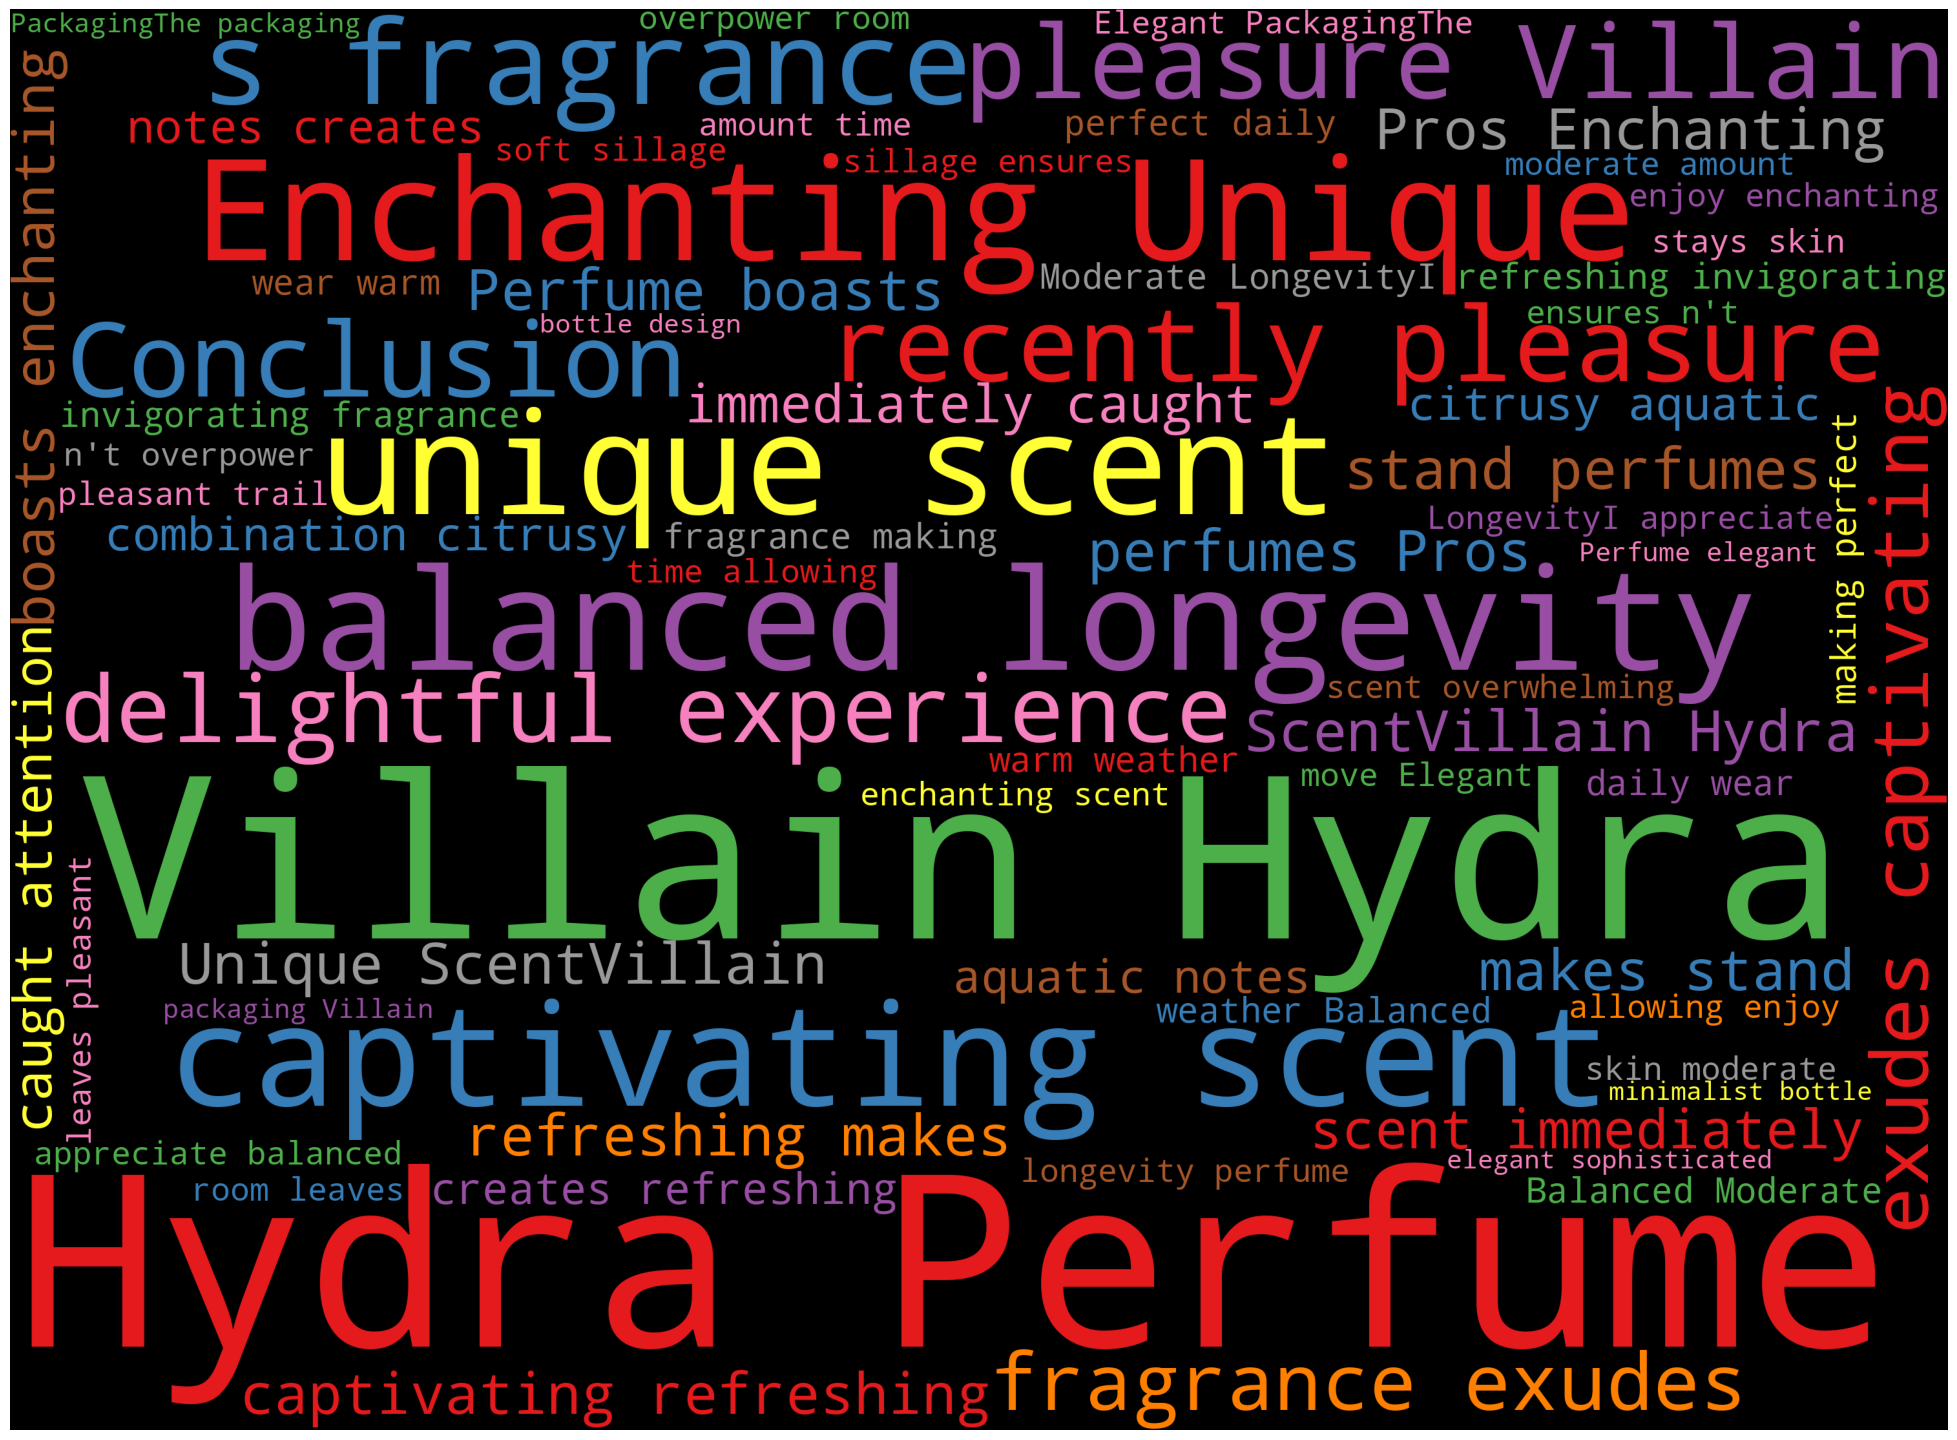

In [ ]:
import wordcloud
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2200,background_color='black',max_words=70,
                    colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

Word Cloud for negative words

In [ ]:
with open ('/content/negative-words.txt','r',encoding='latin-1')as neg:
  negwords=neg.read().split('\n')

In [ ]:
negwords=negwords[35:]

In [ ]:
review_neg=' '.join([word for word in reviews_wwithout_sw if word in negwords])

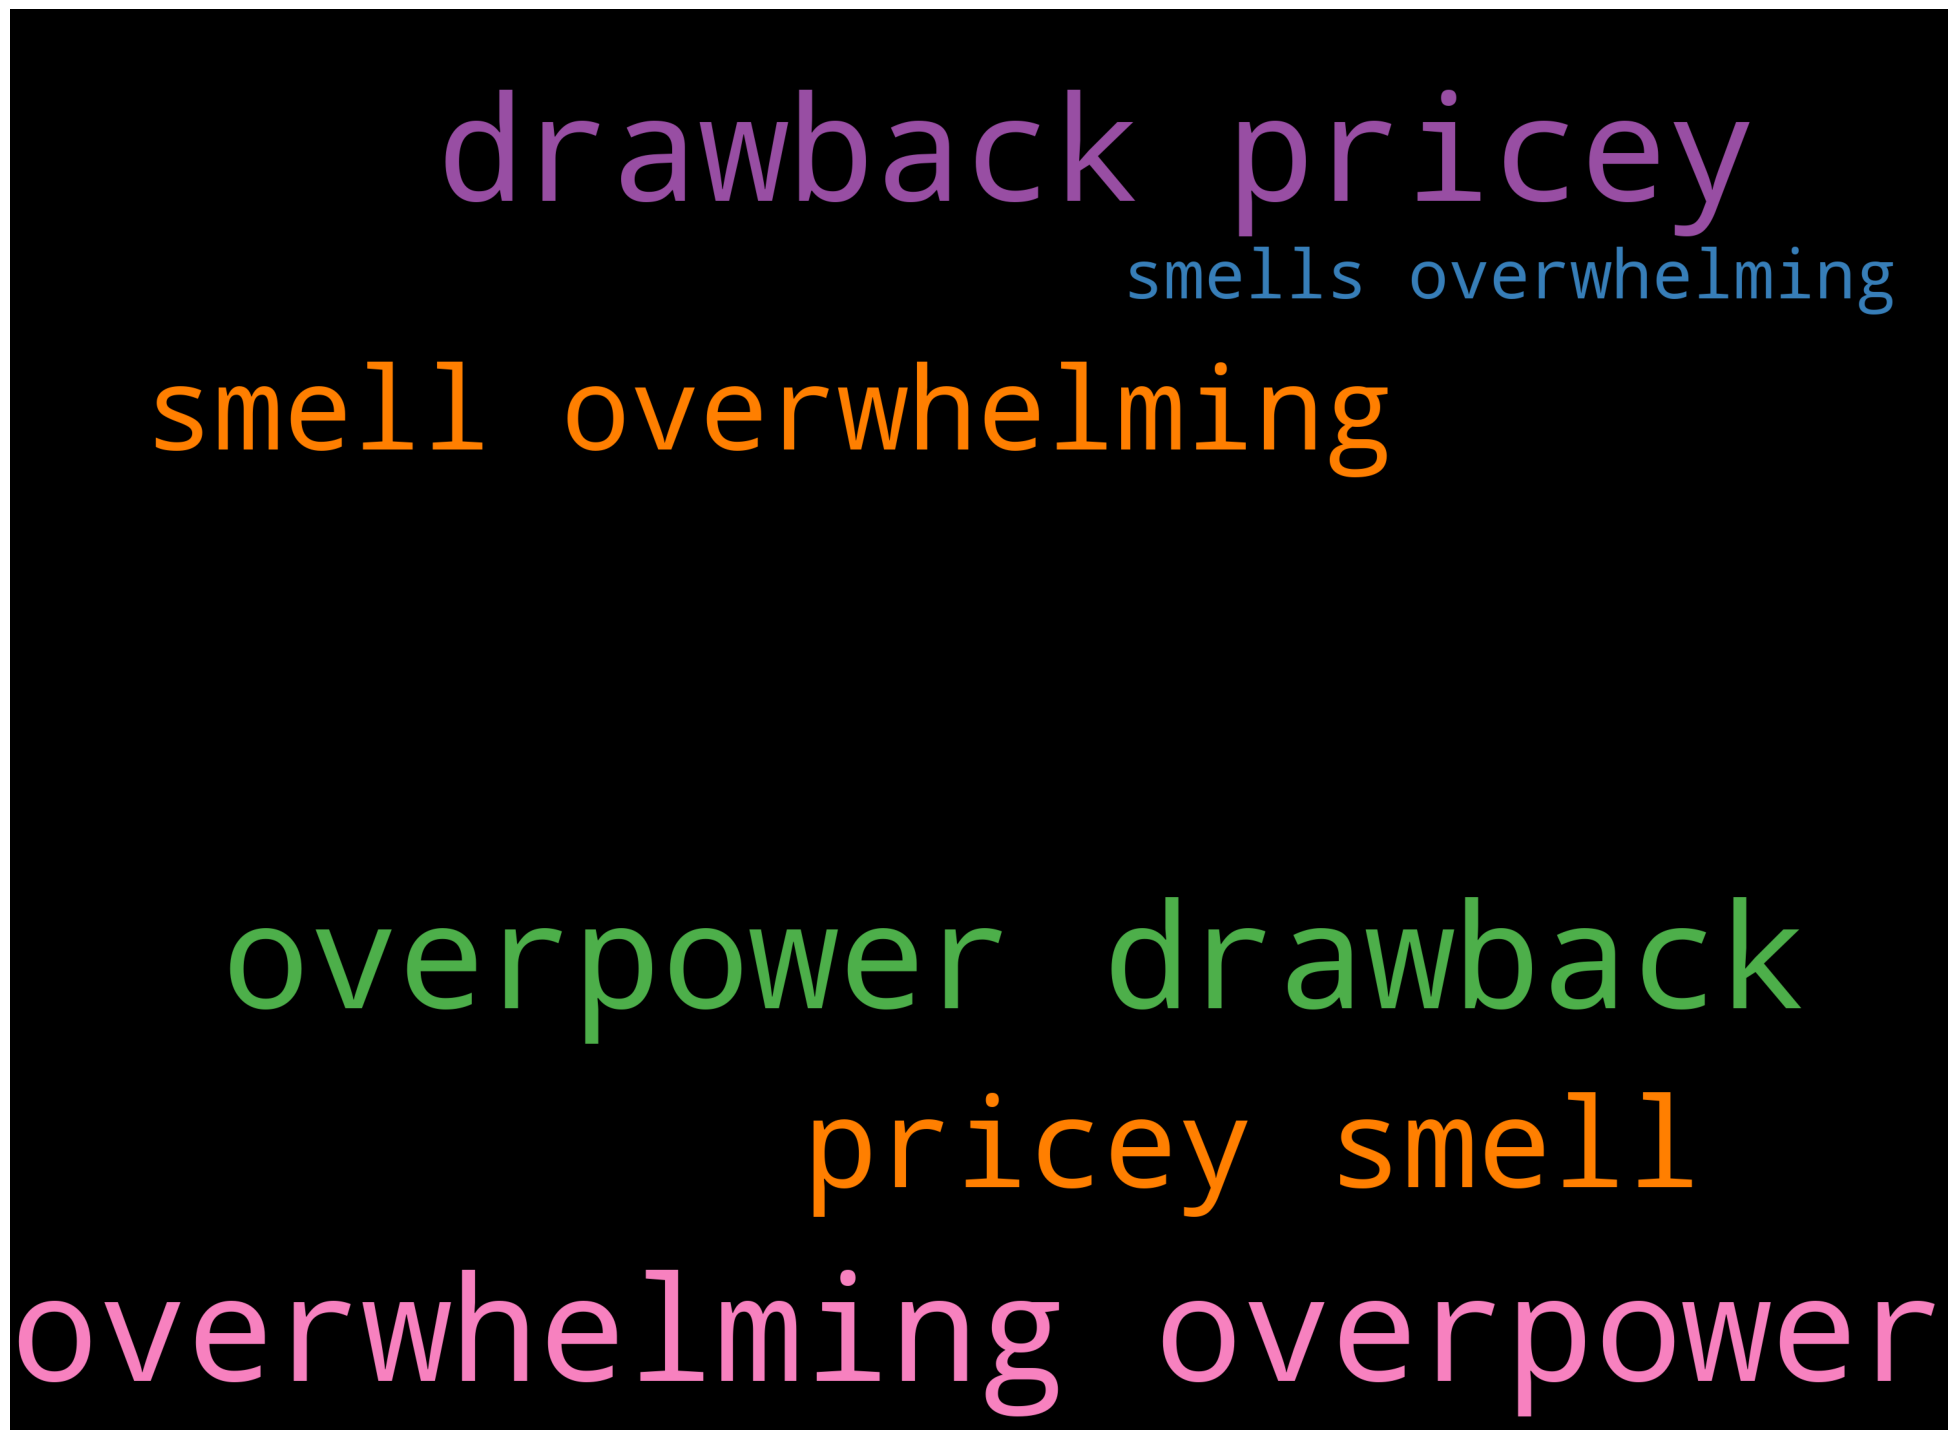

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(25,20))
  plt.imshow(wordcloud)
  plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2200,background_color='black',max_words=70,
                    colormap='Set1',stopwords=STOPWORDS).generate(review_neg)
plot_cloud(wordcloud)

In [ ]:
with open ('/content/positive-words.txt','r',encoding='latin-1')as pos:
  poswords=pos.read().split('\n')

In [ ]:
posword=poswords[35:]

In [ ]:
review_pos=' '.join([word for word in reviews_wwithout_sw if word in posword])

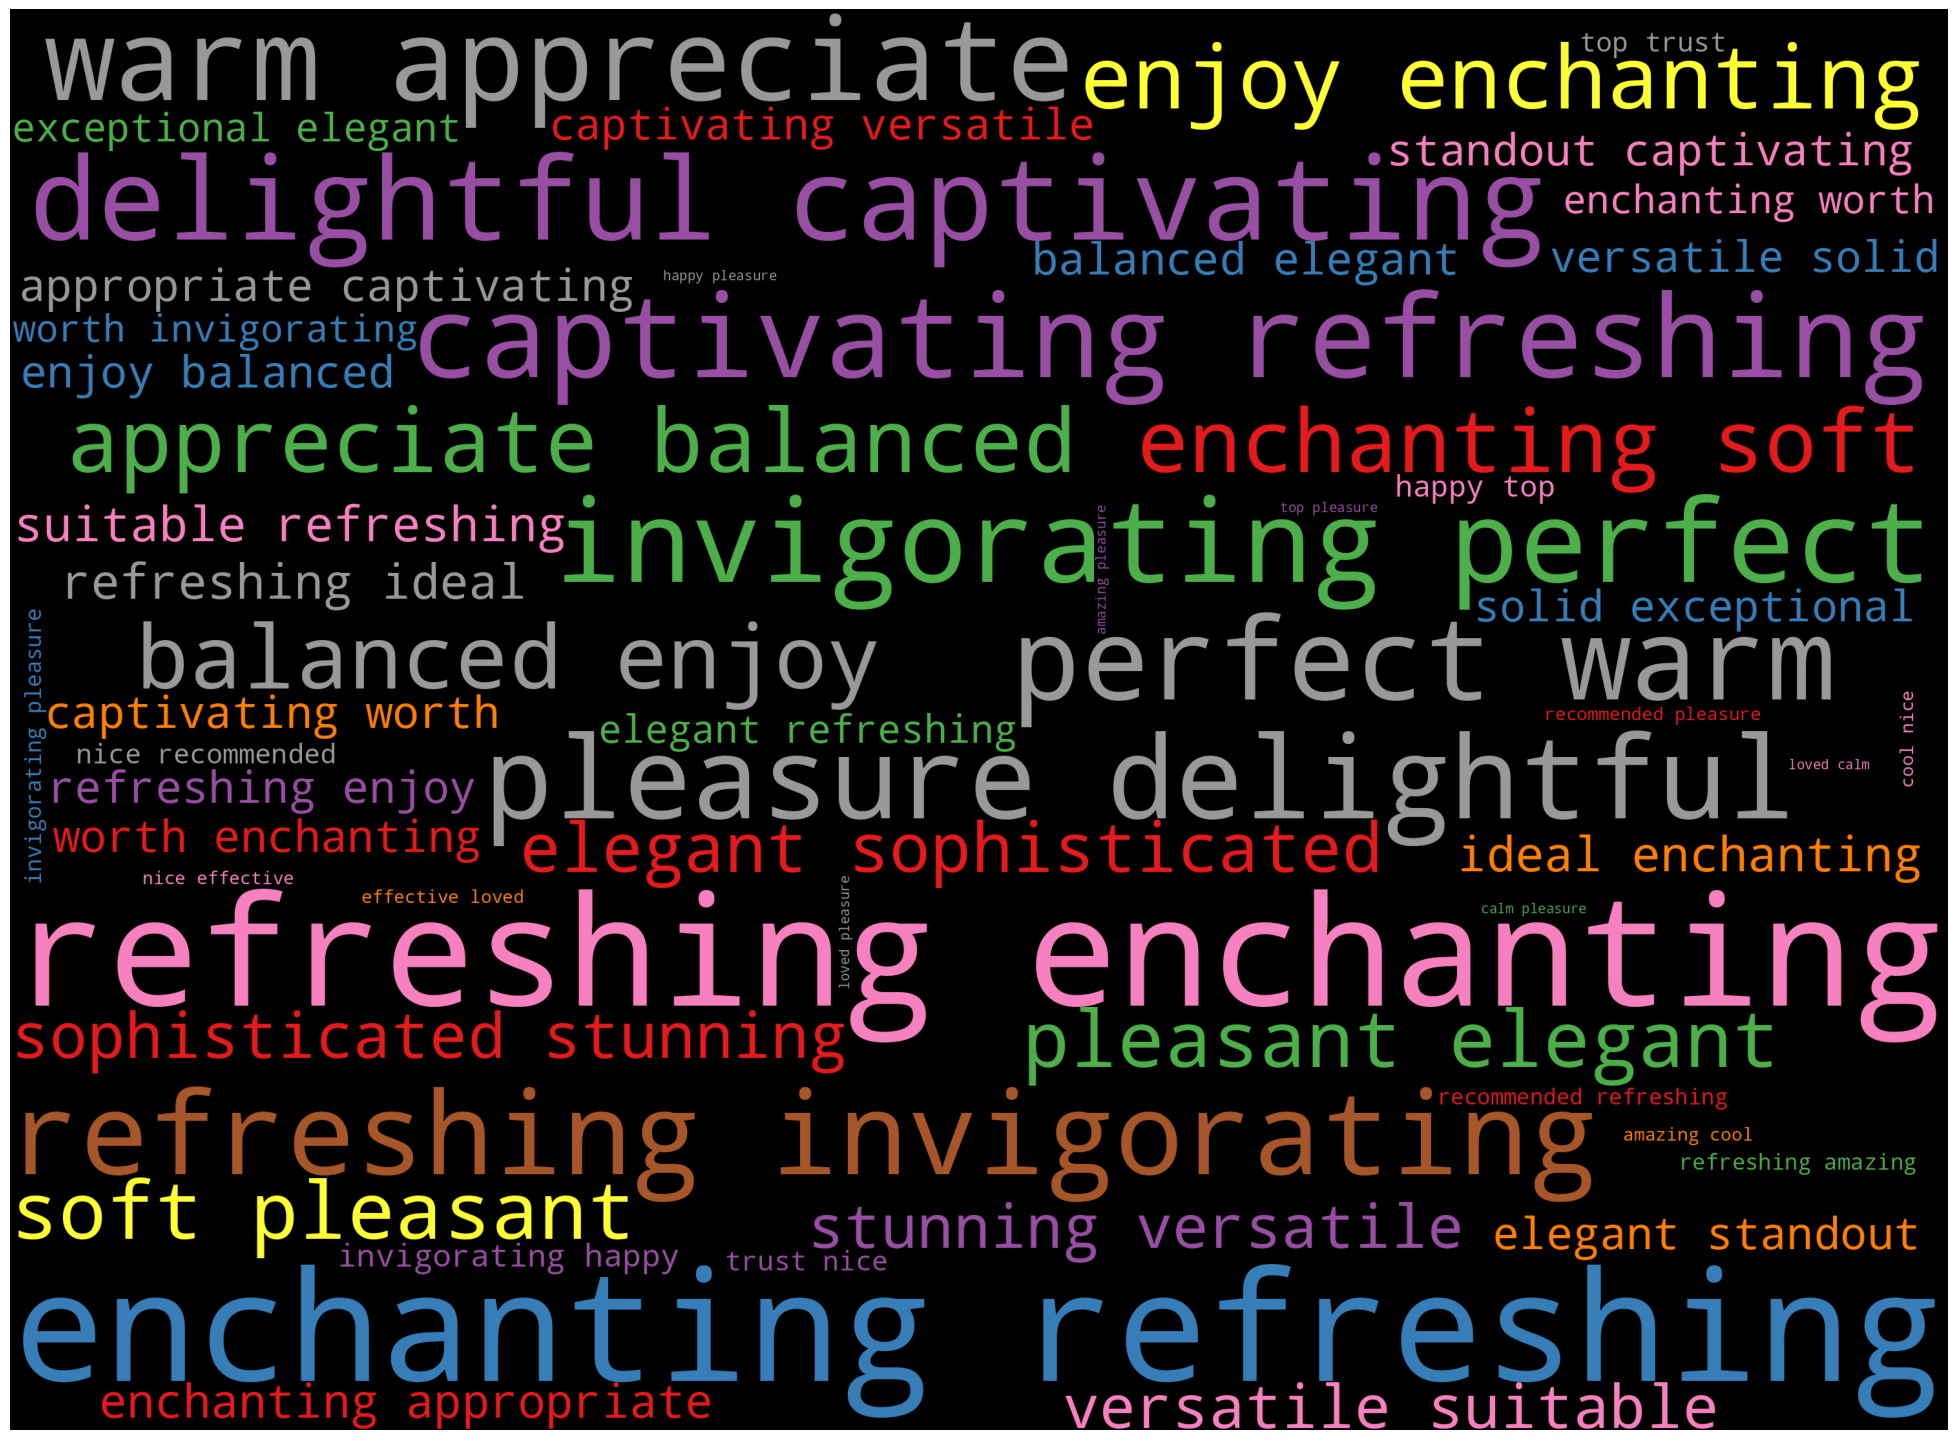

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(25,20))
  plt.imshow(wordcloud)
  plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2200,background_color='black',max_words=70,
                    colormap='Set1',stopwords=STOPWORDS).generate(review_pos)
plot_cloud(wordcloud)

In [ ]:
len(review_pos)

101399

In [ ]:
len(review_neg)

11159

In [ ]:
len(reviews)

513167

In [ ]:
# Positive Reviews=101399/513167
# Negative Reviews=11159/513167

Vander Lexicon

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(reviews)

{'neg': 0.089, 'neu': 0.634, 'pos': 0.277, 'compound': 1.0}

In [ ]:
def get_vedar_sentiment(reviews):
  sia=SentimentIntensityAnalyzer()
  analysis=sia.polarity_scores(reviews)
  if analysis["compound"]>0:
    return 'Positive Sentiment'
  elif analysis['compound']<0:
      return'Negative Sentiment'
  else:
    return 'Neutral '

In [ ]:
  get_vedar_sentiment(reviews)

'Positive Sentiment'